In [5]:
#Importing all required libraries.
from numpy.random import randn
import numpy as np
import pandas as pd
import string
import matplotlib.pyplot as plt
from pandas import Series, DataFrame
import seaborn as sns
import statsmodels.api as sm
sns.set(color_codes=True)
%matplotlib inline

# 1 Data Filtration

## 1.1 Crime Data

This data set includes the crime data for the years 1998 to 2016 in Canada, province wise and all over Canada. Dataset includes the data for different type of violations and then further categorized with different statistics. I am interested in data for total all violations in different provinces. There is other statistics rate per 100,000 population, I could have taken that too. But instead used another data set for population, for different provinces in Canada.

In [10]:
# Loading the whole file for crime data in dataframe
crime_data = pd.read_csv('35100177.csv')
crime_data.head()

,REF_DATE,GEO,DGUID,Violations,Statistics,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
0,1998,Canada,2016A000011124,"Total, all violations",Actual incidents,Number,223,units,0,v44348247,1.1.1,2688540.00,NaN,NaN,NaN,0
1,1998,Canada,2016A000011124,"Total, all violations","Rate per 100,000 population",Rate,257,units,0,v44396346,1.1.2,8915.12,NaN,NaN,NaN,2
2,1998,Canada,2016A000011124,"Total, all violations",Percentage change in rate,Percent,239,units,0,v44391402,1.1.3,NaN,..,NaN,NaN,2
3,1998,Canada,2016A000011124,"Total, all violations",Total cleared,Number,223,units,0,v44327422,1.1.4,1073453.00,NaN,NaN,NaN,0
4,1998,Canada,2016A000011124,"Total, all violations",Cleared by charge,Number,223,units,0,v44327628,1.1.5,705133.00,NaN,NaN,NaN,0


In [11]:
# Checking the years available for the dataset
crime_data.REF_DATE.unique()

array([1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008,
       2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016], dtype=int64)

In [12]:
# Only selecting the rows which are the required one, total violation
crime_data = crime_data.loc[(crime_data.Violations == 'Total, all violations') & (crime_data.Statistics == 'Actual incidents')]
crime_data.head()

,REF_DATE,GEO,DGUID,Violations,Statistics,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
0,1998,Canada,2016A000011124,"Total, all violations",Actual incidents,Number,223,units,0,v44348247,1.1.1,2688540.0,NaN,NaN,NaN,0
2249,1998,Newfoundland and Labrador,2016A000210,"Total, all violations",Actual incidents,Number,223,units,0,v44339986,2.1.1,34904.0,NaN,NaN,NaN,0
4397,1998,"St. John's, Newfoundland and Labrador",2011S0503001,"Total, all violations",Actual incidents,Number,223,units,0,v44369503,3.1.1,13538.0,NaN,NaN,NaN,0
6444,1998,Prince Edward Island,2016A000211,"Total, all violations",Actual incidents,Number,223,units,0,v44361611,4.1.1,9657.0,NaN,NaN,NaN,0
8496,1998,Nova Scotia,2016A000212,"Total, all violations",Actual incidents,Number,223,units,0,v44407145,5.1.1,82469.0,NaN,NaN,NaN,0


In [13]:
# Extracting the required columns from the dataframe, REF_DATE, GEO and Value. Here,
# REF_DATE is the year, 
# GEO is the location
# VALUE is the total crime
crime_data = crime_data[['REF_DATE', 'GEO', 'VALUE']]
crime_data.head()

,REF_DATE,GEO,VALUE
0,1998,Canada,2688540.0
2249,1998,Newfoundland and Labrador,34904.0
4397,1998,"St. John's, Newfoundland and Labrador",13538.0
6444,1998,Prince Edward Island,9657.0
8496,1998,Nova Scotia,82469.0


In [14]:
# Still there are rows with other locations (cities in provinces)
crime_data.GEO.unique()

array(['Canada', 'Newfoundland and Labrador',
       "St. John's, Newfoundland and Labrador", 'Prince Edward Island',
       'Nova Scotia', 'Halifax, Nova Scotia', 'New Brunswick',
       'Saint John, New Brunswick', 'Quebec', 'Saguenay, Quebec',
       'Québec, Quebec', 'Sherbrooke, Quebec', 'Trois-Rivières, Quebec',
       'Montréal, Quebec', 'Ottawa-Gatineau, Quebec part', 'Ontario',
       'Ottawa-Gatineau, Ontario/Quebec', 'Ottawa-Gatineau, Ontario part',
       'Toronto, Ontario', 'Hamilton, Ontario',
       'St.Catharines-Niagara, Ontario',
       'Kitchener-Cambridge-Waterloo, Ontario', 'London, Ontario',
       'Windsor, Ontario', 'Greater Sudbury, Ontario',
       'Thunder Bay, Ontario', 'Manitoba', 'Winnipeg, Manitoba',
       'Saskatchewan', 'Regina, Saskatchewan', 'Saskatoon, Saskatchewan',
       'Alberta', 'Calgary, Alberta', 'Edmonton, Alberta',
       'British Columbia', 'Vancouver, British Columbia',
       'Victoria, British Columbia', 'Yukon', 'Northwest Territories

In [15]:
# Selecting data for only provinces
crime_data = crime_data.loc[(crime_data.GEO == 'Canada') | (crime_data.GEO == 'Newfoundland and Labrador') | (crime_data.GEO == 'Prince Edward Island') | (crime_data.GEO == 'Nova Scotia') | (crime_data.GEO == 'New Brunswick') | (crime_data.GEO == 'Quebec') | (crime_data.GEO == 'Ontario') | (crime_data.GEO == 'Manitoba') | (crime_data.GEO == 'Saskatchewan') | (crime_data.GEO == 'Alberta') | (crime_data.GEO == 'British Columbia') | (crime_data.GEO == 'Yukon') | (crime_data.GEO == 'Northwest Territories') | (crime_data.GEO == 'Nunavut')]
crime_data.head()

,REF_DATE,GEO,VALUE
0,1998,Canada,2688540.0
2249,1998,Newfoundland and Labrador,34904.0
6444,1998,Prince Edward Island,9657.0
8496,1998,Nova Scotia,82469.0
12938,1998,New Brunswick,58156.0


In [16]:
# Renaming the columns
crime_data.columns = ['Year', 'Location', 'Total_violations']
crime_data.columns

Index(['Year', 'Location', 'Total_violations'], dtype='object')

In [17]:
# Sorting and Resetting the index
crime_data.sort_values(by=['Year', 'Location'], inplace=True)
crime_data_filtered = crime_data.reset_index(drop=True)
crime_data_filtered.head()

,Year,Location,Total_violations
0,1998,Alberta,289665.0
1,1998,British Columbia,523862.0
2,1998,Canada,2688540.0
3,1998,Manitoba,131558.0
4,1998,New Brunswick,58156.0


In [18]:
# Copying dataframe to csv file
crime_data_filtered.to_csv('crime_data.csv', sep=',', encoding='utf-8', index=False)

## 1.2 Population Dataset

Population data by year and provice was available as a pdf file. I copied the data from the pdf file into a text file and then cleaned and formatted the data. Numbers for each provice is available as a column, I converted that into rows so that the data can be joined with crime and education dataset.

In [20]:
#After manual analysis of the file, opening the file and loading the data. Since the file only has on row of data, 
#its loaded as string
with open('population_pdf.txt') as f:
    lines = f.readlines()
data=lines[0]

#Clean the data by removing comma, introducing a delimiter (,) and adding a CRLR at the end of each row.
#Eventually the one liner string is loaded as list.
data=data.replace(',','').replace(' ',',')
data=data.replace(',ID,','\r\n').replace(',PR,','\r\n').replace(',PD,','\r\n').replace(',PP','\r\n')
data=data.split()
data[:5]

['1991,28037420,579644,130369,914969,745567,7067396,10431316,1109604,1002713,2592306,3373787,28871,38724,22154',
 '1992,28371264,580109,130827,919451,748121,7110010,10572205,1112689,1003995,2632672,3468802,30084,39416,22883',
 '1993,28684764,579977,132177,923925,748812,7156537,10690038,1117618,1006900,2667292,3567772,30337,39820,23559',
 '1994,29000663,574466,133437,926871,750185,7192403,10819146,1123230,1009575,2700606,3676075,29684,40578,24407',
 '1995,29302311,567397,134415,928120,750943,7219219,10950119,1129150,1014187,2734519,3777390,30442,41432,24978']

In [21]:
#Populating the data in a dataframe from list and assigning column names. 
population_data = pd.DataFrame(np.array(data))
population_data=population_data[0].str.split(',',expand=True)
population_data.columns=['Year','Canada','Newfoundland and Labrador','Prince Edward Island','Nova Scotia','New Brunswick','Quebec','Ontario','Manitoba'
                         ,'Saskatchewan','Alberta','British Columbia','Yukon','Northwest Territories','Nunavut']

population_data.head()

,Year,Canada,Newfoundland and Labrador,Prince Edward Island,Nova Scotia,New Brunswick,Quebec,Ontario,Manitoba,Saskatchewan,Alberta,British Columbia,Yukon,Northwest Territories,Nunavut
0,1991,28037420,579644,130369,914969,745567,7067396,10431316,1109604,1002713,2592306,3373787,28871,38724,22154
1,1992,28371264,580109,130827,919451,748121,7110010,10572205,1112689,1003995,2632672,3468802,30084,39416,22883
2,1993,28684764,579977,132177,923925,748812,7156537,10690038,1117618,1006900,2667292,3567772,30337,39820,23559
3,1994,29000663,574466,133437,926871,750185,7192403,10819146,1123230,1009575,2700606,3676075,29684,40578,24407
4,1995,29302311,567397,134415,928120,750943,7219219,10950119,1129150,1014187,2734519,3777390,30442,41432,24978


In [22]:
# Only selecting the rows which are the required one, total violation
population_data = population_data.loc[7:25,:]
population_data.head()

,Year,Canada,Newfoundland and Labrador,Prince Edward Island,Nova Scotia,New Brunswick,Quebec,Ontario,Manitoba,Saskatchewan,Alberta,British Columbia,Yukon,Northwest Territories,Nunavut
7,1998,30155173,539843,135804,931836,750530,7295935,11365901,1137489,1017332,2899066,3983113,31149,40802,26373
8,1999,30401286,533329,136281,933784,750601,7323250,11504759,1142448,1014524,2952692,4011375,30785,40638,26820
9,2000,30685730,527966,136470,933821,750517,7356951,11683290,1147313,1007565,3004198,4039230,30431,40480,27498
10,2001,31020596,522046,136665,932491,749819,7396415,11897370,1151450,1000239,3058084,4076881,30157,40845,28134
11,2002,31358418,519483,136876,935155,749379,7441498,12093299,1156636,996816,3128262,4100161,30337,41694,28822


In [23]:
# Transposing columns into rows by repeating the year per each column , value combination.
population_data_final=pd.melt(population_data,id_vars='Year',value_name='total_popluation').sort_values('Year')
population_data_final.columns=['Year','Location','Total_Population']
population_data_final.sort_values(by=['Year', 'Location'], inplace=True)
population_data_final=population_data_final.reset_index(drop=True)
population_data_final.head()

,Year,Location,Total_Population
0,1998,Alberta,2899066
1,1998,British Columbia,3983113
2,1998,Canada,30155173
3,1998,Manitoba,1137489
4,1998,New Brunswick,750530


In [24]:
#Writing the cleaned data into csv file.
population_data_final.to_csv('population_data.csv', sep=',', encoding='utf-8', index=False)

## 1.3 Education Dataset

There are two datasets considered, first one is for for education expenditure per capita and second one is for education expenditure as a percentage of gross domestic product (GDP). These data sets also had the extra statistics like crime data. So, I filtered out those statitics and removed extra columns.

### 1.3.1 Education expenditure per capita

In [25]:
# Loading the whole file for education expenditure per capita in dataframe
education_captia = pd.read_csv('37100025.csv')
education_captia.head()

,REF_DATE,GEO,DGUID,Statistics,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
0,2007/2008,Canada,2016A000011124,Expenditure per capita,Dollars,81,units,0,v120644668,1.1,2787.2,NaN,NaN,NaN,2
1,2007/2008,Canada,2016A000011124,Index of change,Index,160,units,0,v120644669,1.2,100.0,NaN,NaN,NaN,0
2,2007/2008,Newfoundland and Labrador,2016A000210,Expenditure per capita,Dollars,81,units,0,v120644670,2.1,2596.6,NaN,NaN,NaN,2
3,2007/2008,Newfoundland and Labrador,2016A000210,Index of change,Index,160,units,0,v120644671,2.2,100.0,NaN,NaN,NaN,0
4,2007/2008,Prince Edward Island,2016A000211,Expenditure per capita,Dollars,81,units,0,v120644672,3.1,2574.5,NaN,NaN,NaN,2


In [26]:
# Only selecting the rows which are the required one
education_captia = education_captia.loc[(education_captia.Statistics == 'Expenditure per capita')]
education_captia.head()

,REF_DATE,GEO,DGUID,Statistics,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
0,2007/2008,Canada,2016A000011124,Expenditure per capita,Dollars,81,units,0,v120644668,1.1,2787.2,NaN,NaN,NaN,2
2,2007/2008,Newfoundland and Labrador,2016A000210,Expenditure per capita,Dollars,81,units,0,v120644670,2.1,2596.6,NaN,NaN,NaN,2
4,2007/2008,Prince Edward Island,2016A000211,Expenditure per capita,Dollars,81,units,0,v120644672,3.1,2574.5,NaN,NaN,NaN,2
6,2007/2008,Nova Scotia,2016A000212,Expenditure per capita,Dollars,81,units,0,v120644674,4.1,2689.2,NaN,NaN,NaN,2
8,2007/2008,New Brunswick,2016A000213,Expenditure per capita,Dollars,81,units,0,v120644676,5.1,2496.8,NaN,NaN,NaN,2


In [27]:
# Extracting only requisite columns
education_captia = education_captia[['REF_DATE', 'GEO', 'VALUE']]
education_captia.head()

,REF_DATE,GEO,VALUE
0,2007/2008,Canada,2787.2
2,2007/2008,Newfoundland and Labrador,2596.6
4,2007/2008,Prince Edward Island,2574.5
6,2007/2008,Nova Scotia,2689.2
8,2007/2008,New Brunswick,2496.8


In [29]:
# Renaming the columns
education_captia.columns = ['Year', 'Location', 'Expenditure_per_capita']
education_captia.columns

Index(['Year', 'Location', 'Expenditure_per_capita'], dtype='object')

In [30]:
# Sorting and Resetting the index
education_captia.sort_values(by=['Year', 'Location'], inplace=True)
education_captia_filtered = education_captia.reset_index(drop=True)
education_captia_filtered.head()

,Year,Location,Expenditure_per_capita
0,2007/2008,Alberta,3016.3
1,2007/2008,British Columbia,2622.3
2,2007/2008,Canada,2787.2
3,2007/2008,Manitoba,2847.8
4,2007/2008,New Brunswick,2496.8


### 1.3.2  Education expenditure as a percentage of gross domestic product (GDP)

In [31]:
# Loading the whole file for Expenditure as a percentage of gross domestic product (GDP) in dataframe
education_gdp = pd.read_csv('37100040.csv')
education_gdp.head()

,REF_DATE,GEO,DGUID,Statistics,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
0,2007/2008,Canada,2016A000011124,Expenditure as a percentage of gross domestic ...,Percentage,242,units,0,v120644696,1.1,5.8,NaN,NaN,NaN,1
1,2007/2008,Canada,2016A000011124,Index of change,Index,160,units,0,v120644697,1.2,100.0,NaN,NaN,NaN,0
2,2007/2008,Newfoundland and Labrador,2016A000210,Expenditure as a percentage of gross domestic ...,Percentage,242,units,0,v120644698,2.1,4.5,NaN,NaN,NaN,1
3,2007/2008,Newfoundland and Labrador,2016A000210,Index of change,Index,160,units,0,v120644699,2.2,100.0,NaN,NaN,NaN,0
4,2007/2008,Prince Edward Island,2016A000211,Expenditure as a percentage of gross domestic ...,Percentage,242,units,0,v120644700,3.1,7.7,NaN,NaN,NaN,1


In [32]:
# Only selecting the rows which are the required one
education_gdp = education_gdp.loc[(education_gdp.Statistics == 'Expenditure as a percentage of gross domestic product (GDP)')]
education_gdp.head()

,REF_DATE,GEO,DGUID,Statistics,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
0,2007/2008,Canada,2016A000011124,Expenditure as a percentage of gross domestic ...,Percentage,242,units,0,v120644696,1.1,5.8,NaN,NaN,NaN,1
2,2007/2008,Newfoundland and Labrador,2016A000210,Expenditure as a percentage of gross domestic ...,Percentage,242,units,0,v120644698,2.1,4.5,NaN,NaN,NaN,1
4,2007/2008,Prince Edward Island,2016A000211,Expenditure as a percentage of gross domestic ...,Percentage,242,units,0,v120644700,3.1,7.7,NaN,NaN,NaN,1
6,2007/2008,Nova Scotia,2016A000212,Expenditure as a percentage of gross domestic ...,Percentage,242,units,0,v120644702,4.1,7.4,NaN,NaN,NaN,1
8,2007/2008,New Brunswick,2016A000213,Expenditure as a percentage of gross domestic ...,Percentage,242,units,0,v120644704,5.1,6.6,NaN,NaN,NaN,1


In [33]:
# Extracting only requsite columns
education_gdp = education_gdp[['REF_DATE', 'GEO', 'VALUE']]
education_gdp.head()

,REF_DATE,GEO,VALUE
0,2007/2008,Canada,5.8
2,2007/2008,Newfoundland and Labrador,4.5
4,2007/2008,Prince Edward Island,7.7
6,2007/2008,Nova Scotia,7.4
8,2007/2008,New Brunswick,6.6


In [34]:
# Renaming the columns
education_gdp.columns = ['Year', 'Location', 'Expenditure_as_percentage_of_GDP']
education_gdp.columns

Index(['Year', 'Location', 'Expenditure_as_percentage_of_GDP'], dtype='object')

In [35]:
# Sorting and Resetting the index
education_gdp.sort_values(by=['Year', 'Location'], inplace=True)
education_gdp_filtered = education_gdp.reset_index(drop=True)
education_gdp_filtered.head()

,Year,Location,Expenditure_as_percentage_of_GDP
0,2007/2008,Alberta,4.1
1,2007/2008,British Columbia,5.7
2,2007/2008,Canada,5.8
3,2007/2008,Manitoba,6.8
4,2007/2008,New Brunswick,6.6


### 1.3.3 Merging the dataframes for Educational expenses 

In [36]:
# Merging the two dataframes
education_data = pd.concat([education_captia_filtered, education_gdp_filtered.Expenditure_as_percentage_of_GDP], axis=1)
education_data.head()

,Year,Location,Expenditure_per_capita,Expenditure_as_percentage_of_GDP
0,2007/2008,Alberta,3016.3,4.1
1,2007/2008,British Columbia,2622.3,5.7
2,2007/2008,Canada,2787.2,5.8
3,2007/2008,Manitoba,2847.8,6.8
4,2007/2008,New Brunswick,2496.8,6.6


In [37]:
# Changing the year from fiscal year to calender year. So that it will match with Crime and Population dataset
education_data.replace('2007/2008', '2008', inplace=True)
education_data.replace('2008/2009', '2009', inplace=True)
education_data.replace('2009/2010', '2010', inplace=True)
education_data.replace('2010/2011', '2011', inplace=True)
education_data.replace('2011/2012', '2012', inplace=True)
education_data.replace('2012/2013', '2013', inplace=True)
education_data.replace('2013/2014', '2014', inplace=True)
education_data.replace('2014/2015', '2015', inplace=True)
education_data.head()

,Year,Location,Expenditure_per_capita,Expenditure_as_percentage_of_GDP
0,2008,Alberta,3016.3,4.1
1,2008,British Columbia,2622.3,5.7
2,2008,Canada,2787.2,5.8
3,2008,Manitoba,2847.8,6.8
4,2008,New Brunswick,2496.8,6.6


In [38]:
# Copying dataframe to csv file
education_data.to_csv('education_data.csv', sep=',', encoding='utf-8', index=False)

## 1.4 Merging all dataframes 

In [39]:
# Merging the crime and population dataframes
data = pd.concat([crime_data_filtered, population_data_final.Total_Population], axis=1)
data[:3]

,Year,Location,Total_violations,Total_Population
0,1998,Alberta,289665.0,2899066
1,1998,British Columbia,523862.0,3983113
2,1998,Canada,2688540.0,30155173


In [40]:
data[['Total_violations','Total_Population']] = data[['Total_violations','Total_Population']].apply(pd.to_numeric)
data[['Crime_per_person']]=data[['Total_violations']].div(data.Total_Population, axis=0)
data[:3]

,Year,Location,Total_violations,Total_Population,Crime_per_person
0,1998,Alberta,289665.0,2899066,0.099917
1,1998,British Columbia,523862.0,3983113,0.131521
2,1998,Canada,2688540.0,30155173,0.089157


In [41]:
# Copying dataframe to csv file
data.to_csv('data.csv', sep=',', encoding='utf-8', index=False)

# 2 Visualization and Statistics

## 2.1 Pivot Tables 

In [42]:
# Total Crimes
pd.pivot_table(data,index=["Year"],values=["Total_violations"],columns=["Location"])

Total_violations                                                      \
Location          Alberta British Columbia     Canada  Manitoba New Brunswick   
Year                                                                            
1998             289665.0         523862.0  2688540.0  131558.0       58156.0   
1999             290612.0         504096.0  2576445.0  132849.0       59337.0   
2000             286787.0         492523.0  2570663.0  134399.0       56935.0   
2001             306773.0         510252.0  2602571.0  141768.0       56251.0   
2002             316476.0         518022.0  2606967.0  141740.0       57570.0   
2003             342201.0         550855.0  2699428.0  156550.0       59576.0   
2004             350224.0         557574.0  2680221.0  159957.0       60965.0   
2005             353060.0         541573.0  2608741.0  148186.0       53781.0   
2006             348036.0         525127.0  2606887.0  145847.0       49970.0   
2007             353358.0         504306.0  2534730.0  139145.0       47018.0   
2008             361213.0         473466.0  2485043.0  128193.0       48594.0   
2009             351582.0         454075.0  2448654.0  137283.0       47975.0   
2010             338660.0         438298.0  2379130.0  130027.0       47735.0   
2011             317298.0         418763.0  2275917.0  121719.0       45809.0   
2012             318356.0         411975.0  2244458.0  121815.0       47498.0   
2013             318310.0         391767.0  2098776.0  110361.0       41384.0   
2014             328090.0         399707.0  2052925.0  107589.0       38280.0   
2015             369546.0         411156.0  2118681.0  115343.0       41575.0   
2016             374304.0         412179.0  2142545.0  124522.0       40048.0   

                                                                               \
Location Newfoundland and Labrador Northwest Territories Nova Scotia  Nunavut   
Year                                                                            
1998                       34904.0               16875.0     82469.0      NaN   
1999                       33251.0               10921.0     85022.0   5207.0   
2000                       34171.0               12311.0     77471.0   6155.0   
2001                       33542.0               13425.0     78216.0   7647.0   
2002                       34359.0               14733.0     78971.0   8969.0   
2003                       35127.0               17182.0     86163.0  10771.0   
2004                       35506.0               19508.0     88252.0  11507.0   
2005                       34504.0               20169.0     82494.0  11100.0   
2006                       34009.0               18877.0     82046.0  10180.0   
2007                       35711.0               20252.0     76904.0   9999.0   
2008                       36175.0               20963.0     72608.0  11770.0   
2009                       37531.0               19973.0     72705.0  12830.0   
2010                       39330.0               22325.0     73827.0  13683.0   
2011                       37465.0               22751.0     69357.0  13488.0   
2012                       36024.0               22367.0     67485.0  14079.0   
2013                       35217.0               21252.0     60490.0  12271.0   
2014                       32842.0               20476.0     58688.0  11768.0   
2015                       33645.0               20893.0     53637.0  12582.0   
2016                       34342.0               19325.0     52604.0  13272.0   

                                                                        
Location   Ontario Prince Edward Island    Quebec Saskatchewan   Yukon  
Year                                                                    
1998      882331.0               9657.0  505388.0     147220.0  6455.0  
1999      821202.0              10813.0  473753.0     142531.0  6851.0  
2000      825187.0              10451.0  479610.0     146698.0  7965.0  
2001 

In [43]:
# Total Population
pd.pivot_table(data,index=["Year"],values=["Total_Population"],columns=["Location"])

Total_Population                                                    \
Location          Alberta British Columbia    Canada Manitoba New Brunswick   
Year                                                                          
1998              2899066          3983113  30155173  1137489        750530   
1999              2952692          4011375  30401286  1142448        750601   
2000              3004198          4039230  30685730  1147313        750517   
2001              3058084          4076881  31020596  1151450        749819   
2002              3128262          4100161  31358418  1156636        749379   
2003              3182852          4123937  31641630  1163528        749434   
2004              3238387          4155017  31938004  1173223        749408   
2005              3321638          4195764  32242364  1178296        748044   
2006              3421361          4241691  32570505  1183524        745609   
2007              3514031          4290988  32887928  1189366        745407   
2008              3595755          4349412  33245773  1197774        746855   
2009              3679092          4410679  33628571  1208589        749954   
2010              3732573          4465924  34005274  1220930        753044   
2011              3790191          4499139  34342780  1233728        755530   
2012              3880755          4546290  34750545  1250265        756777   
2013              3997950          4590081  35152370  1265588        755710   
2014              4108416          4646462  35535348  1280912        754700   
2015              4177527          4694699  35832513  1295422        753944   
2016              4236376          4757658  36264604  1318115        757384   

                                                                              \
Location Newfoundland and Labrador Northwest Territories Nova Scotia Nunavut   
Year                                                                           
1998                        539843                 40802      931836   26373   
1999                        533329                 40638      933784   26820   
2000                        527966                 40480      933821   27498   
2001                        522046                 40845      932491   28134   
2002                        519483                 41694      935155   28822   
2003                        518445                 42595      937676   29322   
2004                        517402                 43305      939612   29857   
2005                        514315                 43401      937899   30339   
2006                        510584                 43178      937869   30812   
2007                        509039                 43374      935071   31395   
2008                        511543                 43350      935865   31892   
2009                        516729                 43149      938194   32600   
2010                        521972                 43278      942073   33353   
2011                        525037                 43501      944469   34196   
2012                        526450                 43594      944943   34707   
2013                        527399                 43773      943049   35414   
2014                        528386                 43867      942209   36067   
2015                        528815                 44214      941545   36608   
2016                        530305                 44617      948618   37177   

                                                                      
Location   Ontario Prince Edward Island   Quebec Saskatchewan  Yukon  
Year                                                                  
1998      11365901               135804  7295935      1017332  31149  
1999      11504759               136281  7323250      1014524  30785  
2000      11683290               136470  7356951      1007565  30431  
2001      11897370               136665  7396415      1000239  30157  
2002      12

In [44]:
# Crime per person
pd.pivot_table(data,index=["Year"],values=["Crime_per_person"],columns=["Location"])

Crime_per_person                                                     \
Location          Alberta British Columbia    Canada  Manitoba New Brunswick   
Year                                                                           
1998             0.099917         0.131521  0.089157  0.115657      0.077487   
1999             0.098423         0.125667  0.084748  0.116285      0.079053   
2000             0.095462         0.121935  0.083774  0.117142      0.075861   
2001             0.100315         0.125157  0.083898  0.123121      0.075019   
2002             0.101167         0.126342  0.083135  0.122545      0.076824   
2003             0.107514         0.133575  0.085313  0.134548      0.079495   
2004             0.108148         0.134193  0.083919  0.136340      0.081351   
2005             0.106291         0.129076  0.080910  0.125763      0.071896   
2006             0.101724         0.123801  0.080038  0.123231      0.067019   
2007             0.100556         0.117527  0.077072  0.116991      0.063077   
2008             0.100455         0.108857  0.074748  0.107026      0.065065   
2009             0.095562         0.102949  0.072815  0.113589      0.063971   
2010             0.090731         0.098143  0.069964  0.106498      0.063389   
2011             0.083716         0.093076  0.066271  0.098660      0.060632   
2012             0.082035         0.090618  0.064588  0.097431      0.062764   
2013             0.079618         0.085351  0.059705  0.087201      0.054762   
2014             0.079858         0.086024  0.057771  0.083994      0.050722   
2015             0.088460         0.087579  0.059127  0.089039      0.055143   
2016             0.088355         0.086635  0.059081  0.094470      0.052877   

                                                                      \
Location Newfoundland and Labrador Northwest Territories Nova Scotia   
Year                                                                   
1998                      0.064656              0.413583    0.088502   
1999                      0.062346              0.268739    0.091051   
2000                      0.064722              0.304125    0.082961   
2001                      0.064251              0.328682    0.083879   
2002                      0.066141              0.353360    0.084447   
2003                      0.067755              0.403381    0.091890   
2004                      0.068624              0.450479    0.093924   
2005                      0.067087              0.464713    0.087956   
2006                      0.066608              0.437190    0.087481   
2007                      0.070154              0.466916    0.082244   
2008                      0.070717              0.483576    0.077584   
2009                      0.072632              0.462884    0.077495   
2010                      0.075349              0.515851    0.078367   
2011                      0.071357              0.522999    0.073435   
2012                      0.068428              0.513075    0.071417   
2013                      0.066775              0.485505    0.064143   
2014                      0.062155              0.466775    0.062288   
2015                      0.063623              0.472543    0.056967   
2016                      0.064759              0.433131    0.055453   

                                                                          \
Location   Nunavut   Ontario Prince Edward Island    Quebec Saskatchewan   
Year                                                                       
1998           NaN  0.077630             0.071110  0.069270     0.144712   
1999      0.194146  0.071379             0.079343  0.064692     0.140491   
2000      0.223834  0.070630             0.076581  0.065191     0.145597   
2001      0.271806  0.068126             0.078659  0.063515     0.155411   
2002      0.311186  0.066096             0.086553  0.062041     0.154855   
2003      0.367335  0.063733             0.095233  0.06

In [45]:
# Educational expenditures per capita
pd.pivot_table(education_data,index=["Location"],values=["Expenditure_per_capita"],columns=["Year"])

Expenditure_per_capita                          \
Year                                        2008    2009    2010    2011   
Location                                                                   
Alberta                                   3016.3  3144.9  3779.5  3614.9   
British Columbia                          2622.3  2602.6  2812.1  2814.7   
Canada                                    2787.2  2778.7  3030.3  3031.1   
Manitoba                                  2847.8  2852.6  3147.4  3153.6   
New Brunswick                             2496.8  2484.7  2710.6  2824.6   
Newfoundland and Labrador                 2596.6  2430.6  3025.2  2871.2   
Northwest Territories                     6681.4  5276.5  6230.8  4962.6   
Nova Scotia                               2689.2  2684.3  3097.1  3081.9   
Nunavut                                   5497.4  5720.8  5730.4  5032.6   
Ontario                                   2837.5  2837.5  3085.5  3159.7   
Prince Edward Island                      2574.5  2808.4  2829.4  2866.8   
Quebec                                    2648.8  2700.4  2665.6  2633.8   
Saskatchewan                              3167.8  2808.6  3077.8  3150.8   
Yukon                                     4396.5  4344.4  4503.9  4646.6   

                                                           
Year                         2012    2013    2014    2015  
Location                                                   
Alberta                    3536.2  3366.2  3257.8  3187.1  
British Columbia           2704.0  2689.3  2721.7  2688.8  
Canada                     2935.2  2907.9  2946.3  2951.9  
Manitoba                   3022.9  3072.5  3130.2  3199.6  
New Brunswick              2604.9  2555.9  2506.6  2594.1  
Newfoundland and Labrador  2683.2  2688.0  2554.2  2654.8  
Northwest Territories      4616.5  5211.7  5140.4  5289.4  
Nova Scotia                2962.8  2892.1  2936.4  3032.6  
Nunavut                    4816.7  4805.9  4937.0  4734.9  
Ontario                    3064.9  3043.2  3119.4  3155.1  
Prince Edward Island       2857.2  2763.4  2770.2  2654.1  
Quebec                     2601.3  2579.9  2674.6  2670.4  
Saskatchewan               2839.5  2903.3  2996.1  3193.9  
Yukon                      4193.8  4344.7  4655.7  5214.5

In [46]:
# Educationalexpenditure as percentage of GDP
pd.pivot_table(education_data,index=["Location"],values=["Expenditure_as_percentage_of_GDP"],columns=["Year"])

Expenditure_as_percentage_of_GDP                    \
Year                                                  2008  2009  2010  2011   
Location                                                                       
Alberta                                                4.1   4.3   5.6   5.2   
British Columbia                                       5.7   5.7   6.4   6.3   
Canada                                                 5.8   5.8   6.6   6.5   
Manitoba                                               6.8   6.6   7.5   7.4   
New Brunswick                                          6.6   6.5   7.1   7.3   
Newfoundland and Labrador                              4.5   4.3   6.0   5.5   
Northwest Territories                                  6.2   5.3   7.0   5.5   
Nova Scotia                                            7.4   7.3   8.4   8.1   
Nunavut                                               13.1  12.1  13.2  10.6   
Ontario                                                6.0   6.1   6.9   7.0   
Prince Edward Island                                   7.7   8.4   8.4   8.5   
Quebec                                                 6.7   6.7   6.7   6.6   
Saskatchewan                                           6.1   5.3   6.0   6.0   
Yukon                                                  7.9   7.2   7.1   7.3   

                                                   
Year                       2012  2013  2014  2015  
Location                                           
Alberta                     4.9   4.6   4.4   4.2  
British Columbia            5.9   5.8   5.7   5.5  
Canada                      6.2   6.1   6.1   6.0  
Manitoba                    7.0   7.0   7.1   7.1  
New Brunswick               6.7   6.7   6.6   6.9  
Newfoundland and Labrador   5.0   5.2   4.8   5.0  
Northwest Territories       5.7   6.4   6.2   6.1  
Nova Scotia                 7.8   7.8   7.8   7.9  
Nunavut                    10.2  10.4  10.0  10.2  
Ontario                     6.6   6.6   6.7   6.7  
Prince Edward Island        8.4   8.1   7.9   7.6  
Quebec                      6.5   6.4   6.6   6.5  
Saskatchewan                5.3   5.5   5.4   5.7  
Yukon                       6.4   6.4   6.7   7.7

## 2.2 Statistics 

In [47]:
# data only for Canada
crime_canada = data[data['Location'] == 'Canada']
crime_canada = crime_canada.reset_index(drop=True)

education_canada = education_data[education_data['Location'] == "Canada"]
education_canada = education_canada.reset_index(drop=True)

In [48]:
# data only for provinces
crime_provinces = data[data['Location'] != 'Canada']
crime_provinces = crime_provinces.reset_index(drop=True)

education_provinces = education_data[education_data['Location'] != "Canada"]
education_provinces = education_provinces.reset_index(drop=True)

### 2.2.1 Statistics 

In [49]:
# Statistics for crime, population and crime per person for overall Canada
crime_canada.describe()

,Year,Total_violations,Total_Population,Crime_per_person
count,19.000000,1.900000e+01,1.900000e+01,19.000000
mean,2007.000000,2.443227e+06,3.303471e+07,0.074528
std,5.627314,2.199538e+05,1.923700e+06,0.010580
min,1998.000000,2.052925e+06,3.015517e+07,0.057771
25%,2002.500000,2.260188e+06,3.150002e+07,0.065429
50%,2007.000000,2.534730e+06,3.288793e+07,0.077072
75%,2011.500000,2.606927e+06,3.454666e+07,0.083836
max,2016.000000,2.699428e+06,3.626460e+07,0.089157


In [50]:
# Statistics for crime, population and crime per person for provinces
crime_provinces.describe()

,Year,Total_violations,Total_Population,Crime_per_person
count,247.000000,246.000000,2.470000e+02,246.000000
mean,2007.000000,188704.560976,2.541131e+06,0.143915
std,5.488347,221679.903479,3.671110e+06,0.118844
min,1998.000000,5207.000000,2.637300e+04,0.039975
25%,2002.000000,17605.750000,1.370485e+05,0.067036
50%,2007.000000,77187.500000,9.378990e+05,0.090177
75%,2012.000000,349677.000000,3.835473e+06,0.152215
max,2016.000000,882331.000000,1.397632e+07,0.522999


In [51]:
# Statistics for educational expenditures for overall Canada
education_canada.describe()

,Expenditure_per_capita,Expenditure_as_percentage_of_GDP
count,8.000000,8.000000
mean,2921.075000,6.137500
std,95.758875,0.292465
min,2778.700000,5.800000
25%,2877.725000,5.950000
50%,2940.750000,6.100000
75%,2971.500000,6.275000
max,3031.100000,6.600000


In [52]:
# Statistics for educational expenditures for provinces
education_provinces.describe()

,Expenditure_per_capita,Expenditure_as_percentage_of_GDP
count,104.000000,104.000000
mean,3378.537500,6.812500
std,987.714416,1.679094
min,2430.600000,4.100000
25%,2689.275000,5.700000
50%,3006.200000,6.600000
75%,3555.875000,7.400000
max,6681.400000,13.200000


### 2.2.3 Plots for overall Canada Data

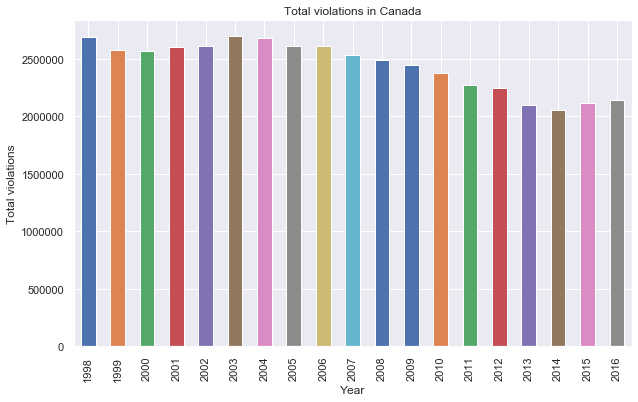

In [53]:
ax = crime_canada.plot(x= "Year", y="Total_violations", kind='bar', title ="Total violations in Canada", figsize=(10, 6), legend=False)
ax.set_xlabel("Year")
ax.set_ylabel("Total violations")
plt.show()

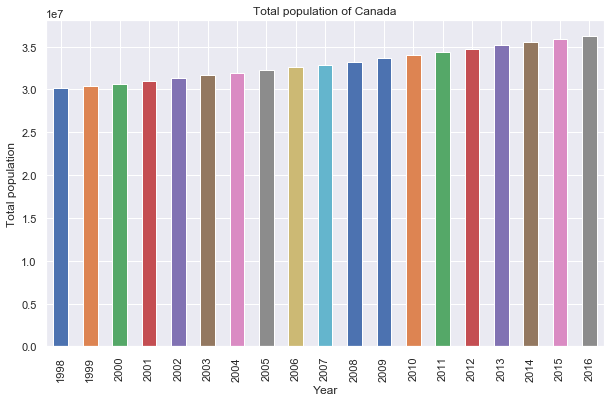

In [54]:
ax = crime_canada.plot(x= "Year", y="Total_Population", kind='bar', title ="Total population of Canada", figsize=(10, 6), legend=False)
ax.set_xlabel("Year")
ax.set_ylabel("Total population")
plt.show()

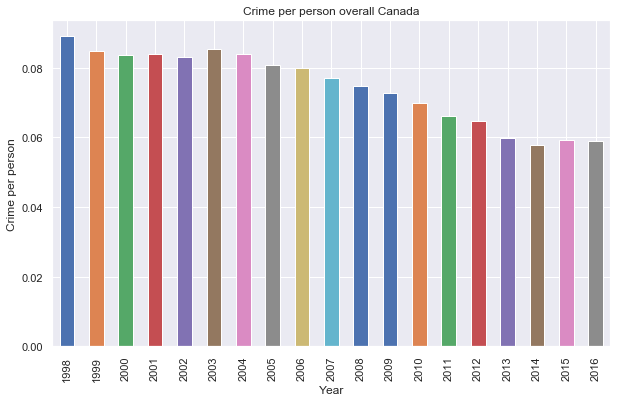

In [55]:
ax = crime_canada.plot(x= "Year", y="Crime_per_person", kind='bar', title ="Crime per person overall Canada", figsize=(10, 6), legend=False)
ax.set_xlabel("Year")
ax.set_ylabel("Crime per person")
plt.show()

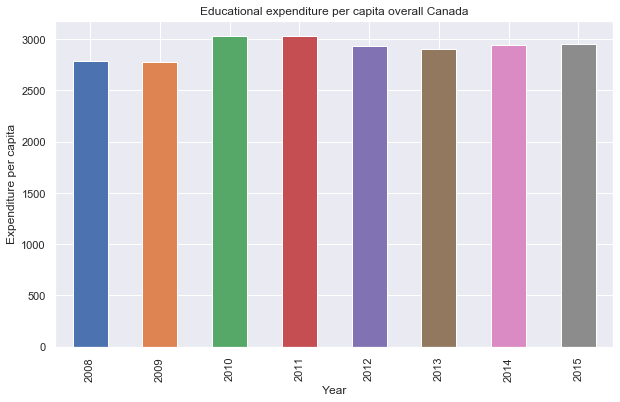

In [56]:
ax = education_canada.plot(x='Year', y= 'Expenditure_per_capita', kind='bar', title ="Educational expenditure per capita overall Canada", figsize=(10, 6), legend=False)
ax.set_xlabel("Year")
ax.set_ylabel("Expenditure per capita")
plt.show()

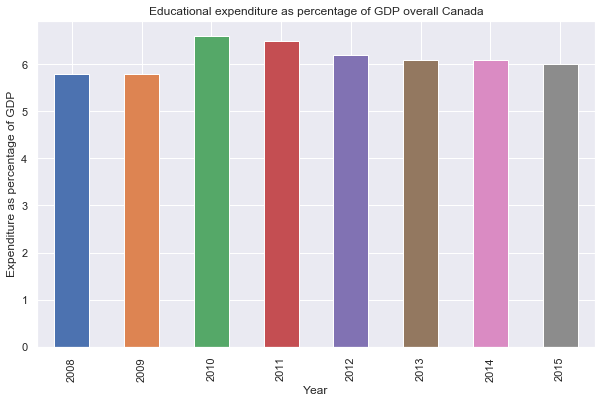

In [57]:
ax = education_canada.plot(x='Year', y= 'Expenditure_as_percentage_of_GDP', kind='bar', title ="Educational expenditure as percentage of GDP overall Canada", figsize=(10, 6), legend=False)
ax.set_xlabel("Year")
ax.set_ylabel("Expenditure as percentage of GDP")
plt.show()

### 2.2.3 Mean plots for provinces

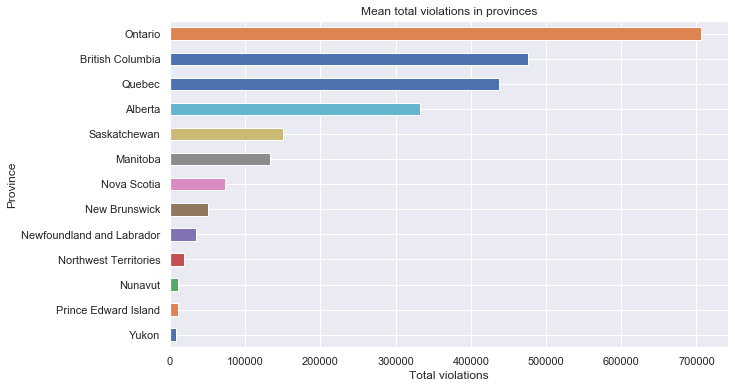

In [58]:
# plot for mean total violations for provinces
ax = crime_provinces.groupby('Location')['Total_violations'].mean().sort_values().plot(kind = 'barh', figsize = (10,6), title ="Mean total violations in provinces")
ax.set_xlabel("Total violations")
ax.set_ylabel("Province")
plt.show()

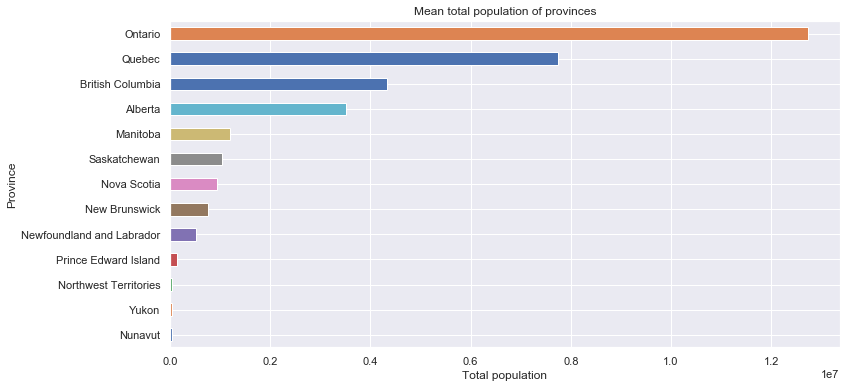

In [59]:
# plot for mean total population for provinces
ax = crime_provinces.groupby('Location')['Total_Population'].mean().sort_values().plot(kind = 'barh', figsize = (12,6), title ="Mean total population of provinces")
ax.set_xlabel("Total population")
ax.set_ylabel("Province")
plt.show()

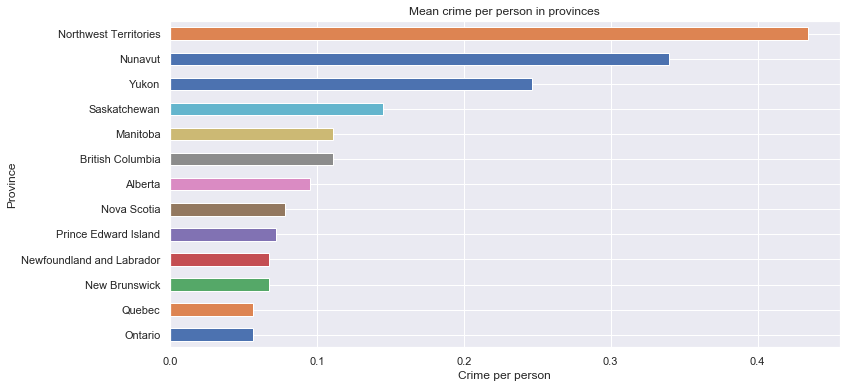

In [60]:
# plot for mean crime_per_person for provinces
ax = crime_provinces.groupby('Location')['Crime_per_person'].mean().sort_values().plot(kind = 'barh', figsize = (12,6), title ="Mean crime per person in provinces")
ax.set_xlabel("Crime per person")
ax.set_ylabel("Province")
plt.show()

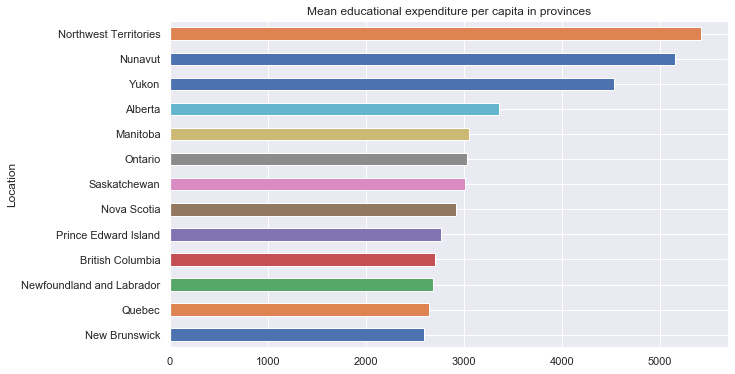

In [61]:
# plot for mean education expernditure per capita for provinces
education_provinces.groupby('Location')['Expenditure_per_capita'].mean().sort_values().plot(kind = 'barh', figsize = (10,6), title ="Mean educational expenditure per capita in provinces")
ax.set_xlabel("Expenditure per capita")
ax.set_ylabel("Province")
plt.show()

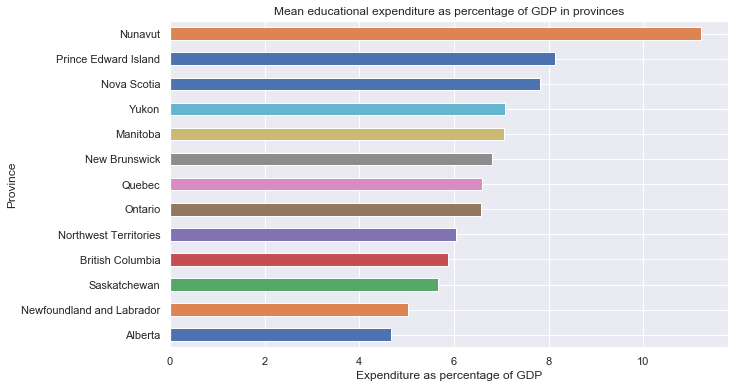

In [62]:
# plot for mean education expernditure as percentage of GDP for provinces
ax = education_provinces.groupby('Location')['Expenditure_as_percentage_of_GDP'].mean().sort_values().plot(kind = 'barh', figsize = (10,6), title ="Mean educational expenditure as percentage of GDP in provinces")
ax.set_xlabel("Expenditure as percentage of GDP")
ax.set_ylabel("Province")
plt.show()

# 3 Analysis

For the analysis purpose I am going to have the data range from 2008 to 2015, as all the data is available in this case, 
i.e, crime, population and education

In [63]:
# Extract crime data for 2008 to 2015
data = data.loc[(data.Year > 2007) & (data.Year < 2016)]
data = data.reset_index(drop=True)

In [65]:
# Concatinating crime and educational data into a single data frame
data_all = pd.concat([data, education_data.Expenditure_per_capita, education_data.Expenditure_as_percentage_of_GDP], axis=1)
data_all.head(3)

,Year,Location,Total_violations,Total_Population,Crime_per_person,Expenditure_per_capita,Expenditure_as_percentage_of_GDP
0,2008,Alberta,361213.0,3595755,0.100455,3016.3,4.1
1,2008,British Columbia,473466.0,4349412,0.108857,2622.3,5.7
2,2008,Canada,2485043.0,33245773,0.074748,2787.2,5.8


In [66]:
# Spliting the data for all over canada and only for provinces
data_provinces = data_all[data_all['Location'] != 'Canada']
data_provinces = data_provinces.reset_index(drop=True)

data_canada = data_all[data_all['Location'] == "Canada"]
data_canada = data_canada.reset_index(drop=True)

## 3.1 Plots 

### 3.1.1 Crime decrease for provinces 

for all provinces crime statistic decreases but for Yukon - increas

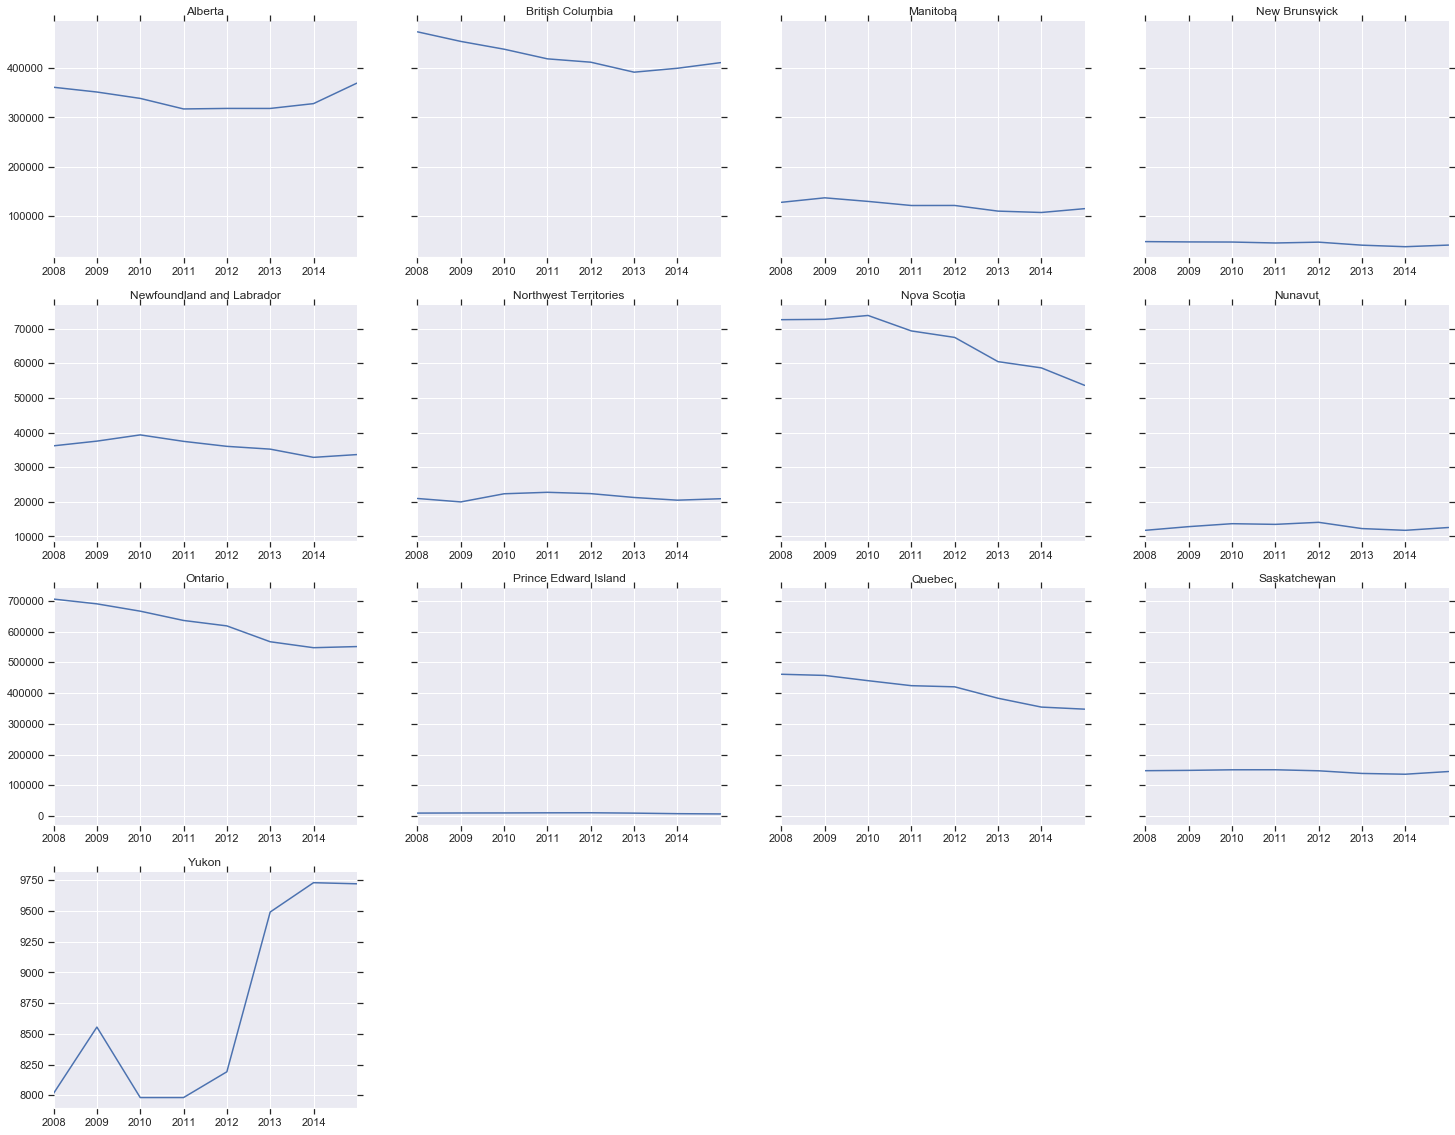

In [67]:
#plot violations / provinces

fig, axes = plt.subplots(nrows=4, ncols=4, sharex=False, sharey='row', figsize=(25,20))
axes_list = [item for sublist in axes for item in sublist] 

for provincename, selection in data_provinces.groupby('Location'):
    ax = axes_list.pop(0)
    selection.plot(x='Year', y='Total_violations', label=provincename, ax=ax, legend=False)
    ax.set_title(provincename)
    ax.tick_params(
        which='both',
        bottom='off',
        left='off',
        right='off',
        top='off'
    )
    ax.grid(linewidth=1)
    ax.set_xlim((2008, 2015))
    ax.set_xlabel("")
    ax.set_xticks(range(2008, 2015, 1))
    
    ax.spines['left'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

# Now use the matplotlib .remove() method to 
# delete anything we didn't use
for ax in axes_list:
    ax.remove()

### 3.1.2 Population increase for provinces 

unusual increasing of population in the Yukon. As for other provinces it is more or less steady line.

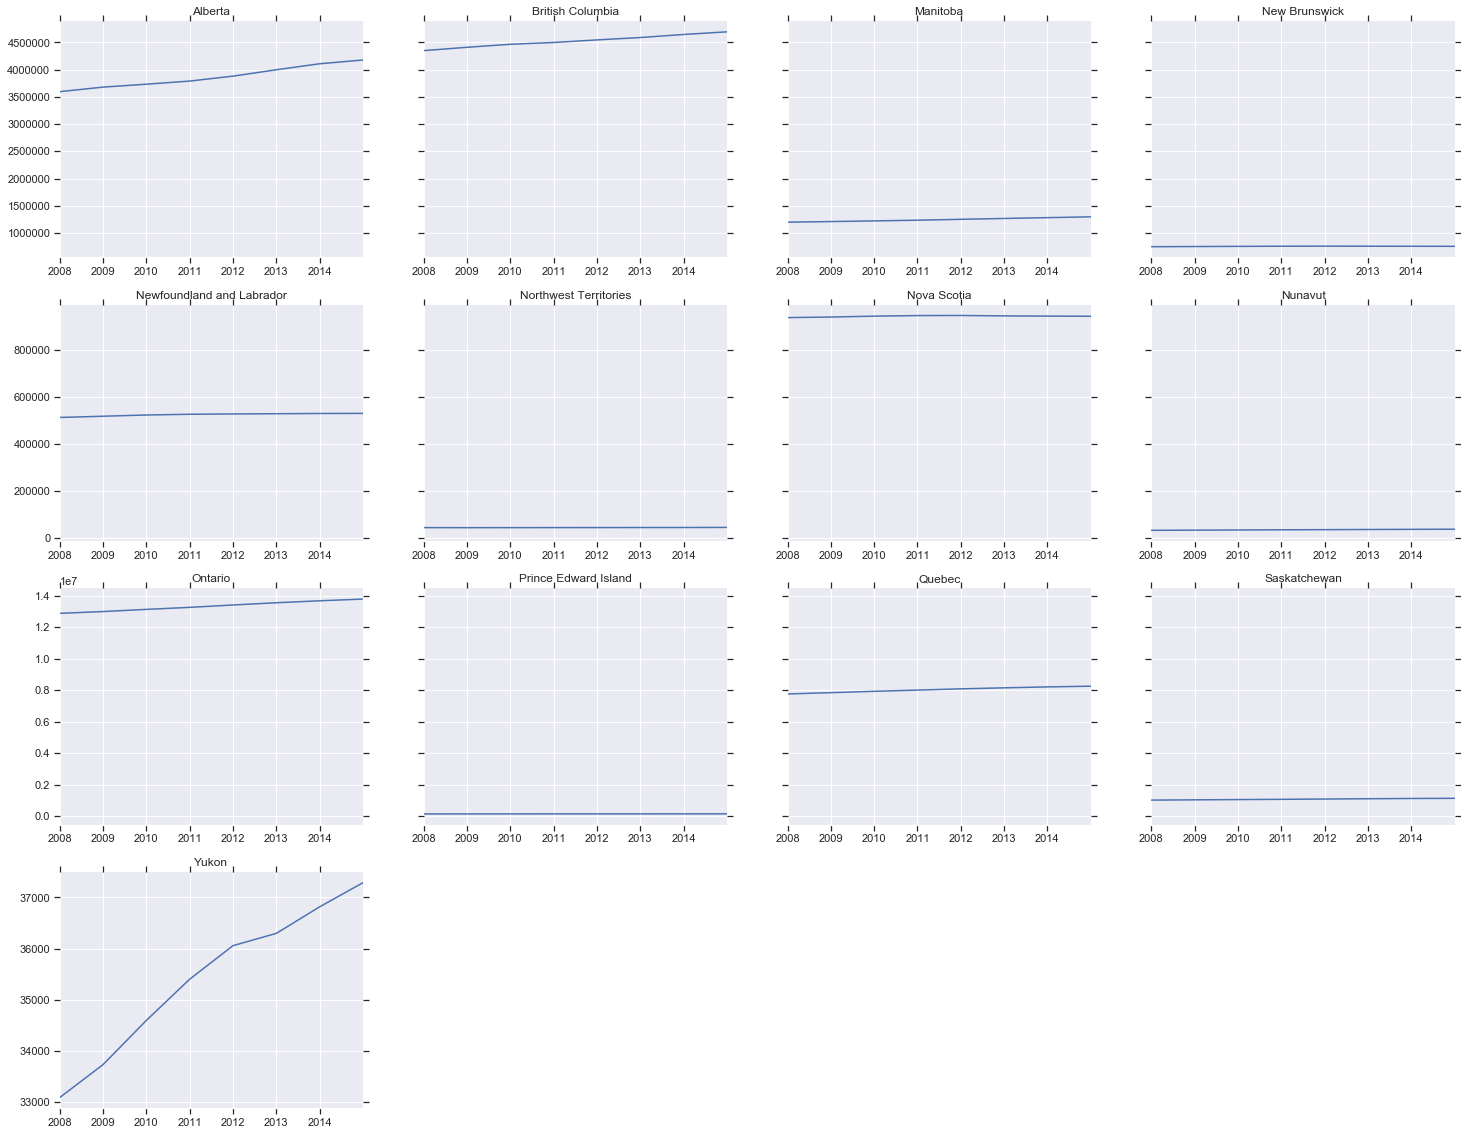

In [68]:
#plot population / provinces

fig, axes = plt.subplots(nrows=4, ncols=4, sharex=False, sharey='row', figsize=(25,20))
axes_list = [item for sublist in axes for item in sublist] 

for provincename, selection in data_provinces.groupby('Location'):
    ax = axes_list.pop(0)
    selection.plot(x='Year', y='Total_Population', label=provincename, ax=ax, legend=False)
    ax.set_title(provincename)
    ax.tick_params(
        which='both',
        bottom='off',
        left='off',
        right='off',
        top='off'
    )
    ax.grid(linewidth=1)
    ax.set_xlim((2008, 2015))
    ax.set_xlabel("")
    ax.set_xticks(range(2008, 2015, 1))
    
    ax.spines['left'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

# Now use the matplotlib .remove() method to 
# delete anything we didn't use
for ax in axes_list:
    ax.remove()

### 3.1.3 Crime per person for provinces 

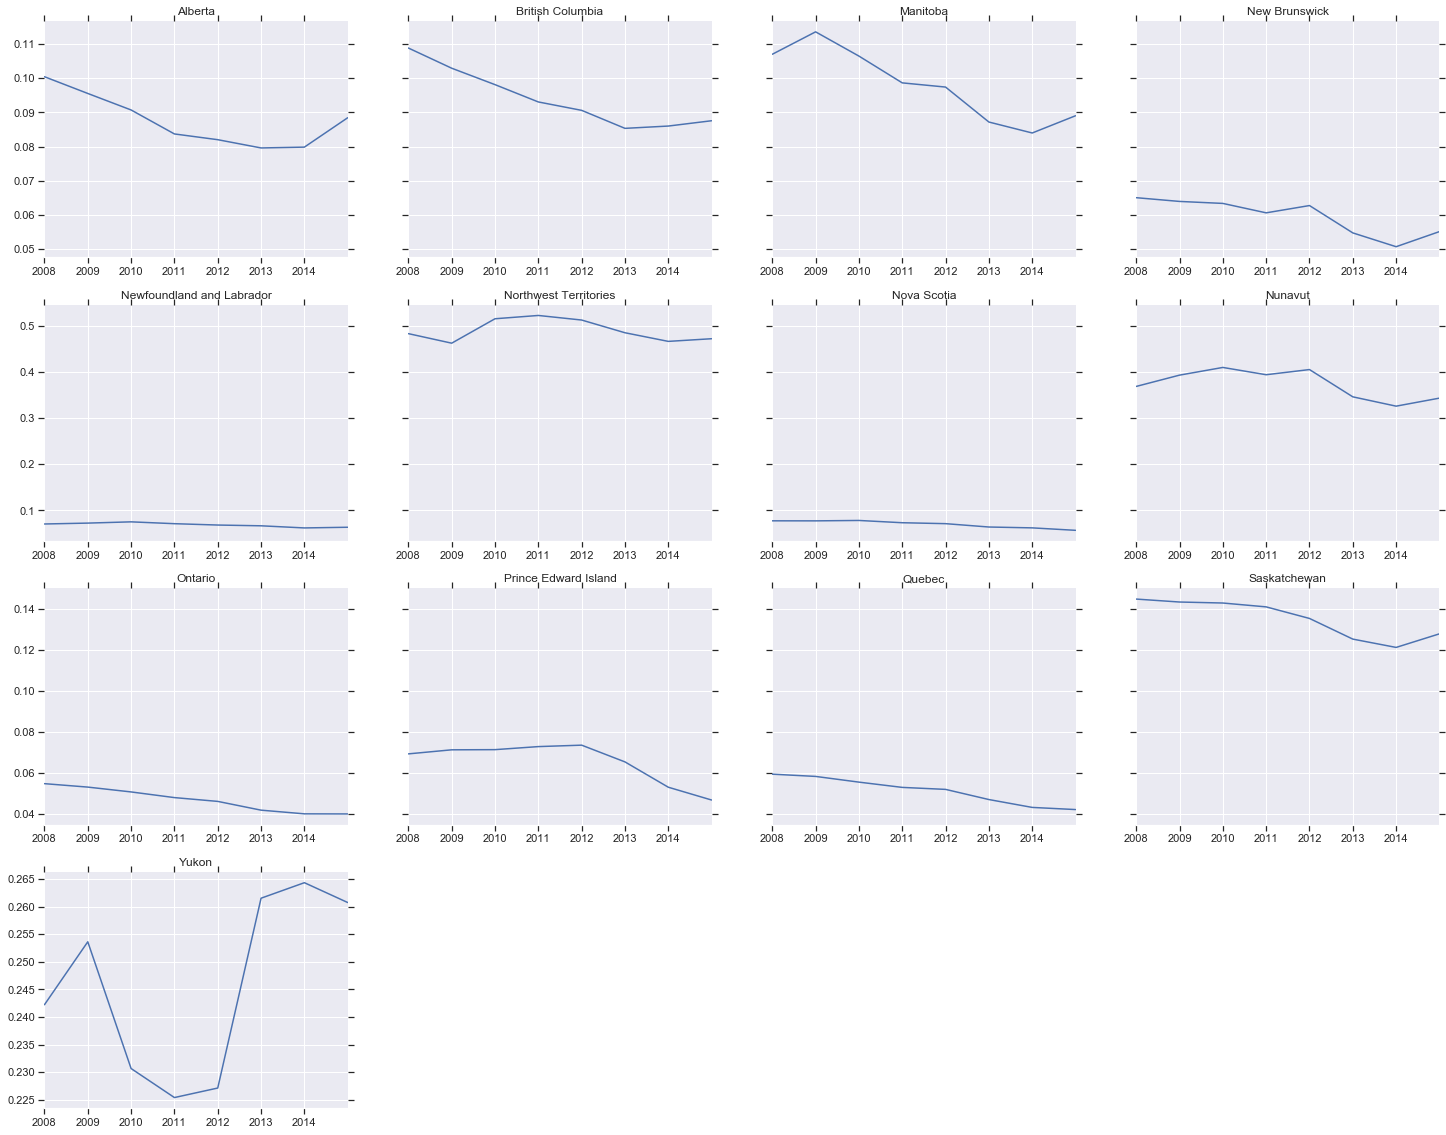

In [69]:
#plot crime per person / provinces

fig, axes = plt.subplots(nrows=4, ncols=4, sharex=False, sharey='row', figsize=(25,20))
axes_list = [item for sublist in axes for item in sublist] 

for provincename, selection in data_provinces.groupby('Location'):
    ax = axes_list.pop(0)
    selection.plot(x='Year', y='Crime_per_person', label=provincename, ax=ax, legend=False)
    ax.set_title(provincename)
    ax.tick_params(
        which='both',
        bottom='off',
        left='off',
        right='off',
        top='off'
    )
    ax.grid(linewidth=1)
    ax.set_xlim((2008, 2015))
    ax.set_xlabel("")
    ax.set_xticks(range(2008, 2015, 1))
    
    ax.spines['left'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

# Now use the matplotlib .remove() method to 
# delete anything we didn't use
for ax in axes_list:
    ax.remove()

### 3.1.4 Education expenditure per capita for provinces

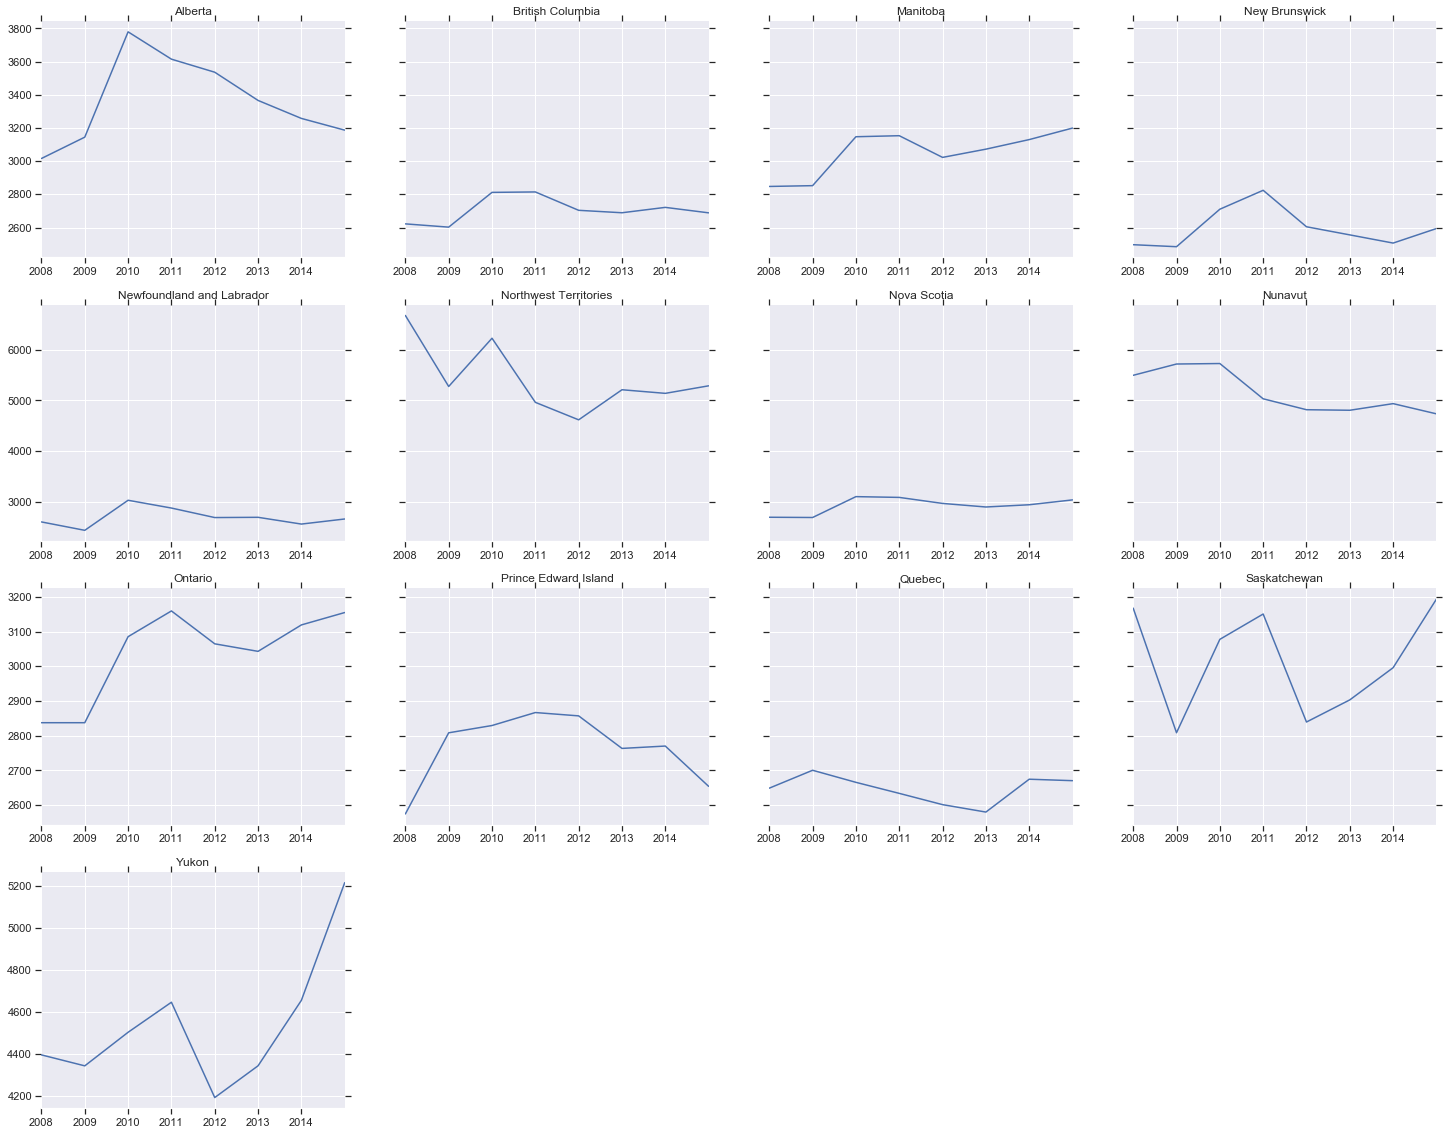

In [70]:
#plot education expenditure per capita / provinces

fig, axes = plt.subplots(nrows=4, ncols=4, sharex=False, sharey='row', figsize=(25,20))
axes_list = [item for sublist in axes for item in sublist] 

for provincename, selection in data_provinces.groupby('Location'):
    ax = axes_list.pop(0)
    selection.plot(x='Year', y='Expenditure_per_capita', label=provincename, ax=ax, legend=False)
    ax.set_title(provincename)
    ax.tick_params(
        which='both',
        bottom='off',
        left='off',
        right='off',
        top='off'
    )
    ax.grid(linewidth=1)
    ax.set_xlim((2008, 2015))
    ax.set_xlabel("")
    ax.set_xticks(range(2008, 2015, 1))
    
    ax.spines['left'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

# Now use the matplotlib .remove() method to 
# delete anything we didn't use
for ax in axes_list:
    ax.remove()

### 3.1.5 Education Expenditure as percentage of GDP for provinces

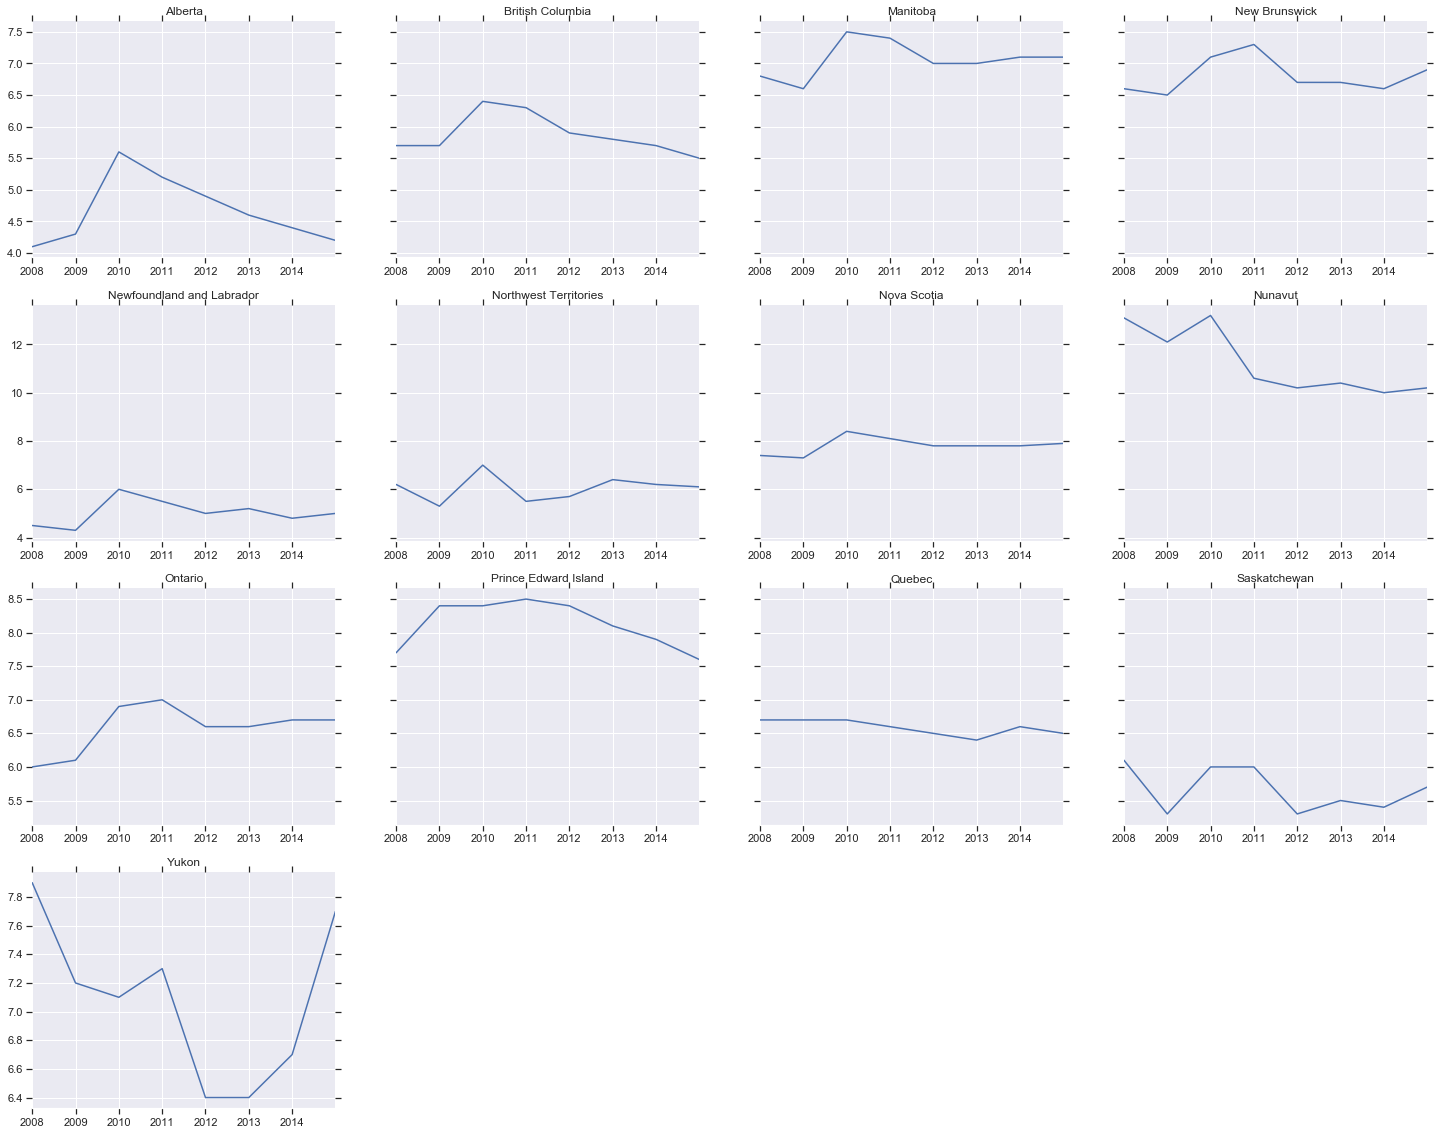

In [71]:
#plot education expenditure as percentage of GDP / provinces

fig, axes = plt.subplots(nrows=4, ncols=4, sharex=False, sharey='row', figsize=(25,20))
axes_list = [item for sublist in axes for item in sublist] 

for provincename, selection in data_provinces.groupby('Location'):
    ax = axes_list.pop(0)
    selection.plot(x='Year', y='Expenditure_as_percentage_of_GDP', label=provincename, ax=ax, legend=False)
    ax.set_title(provincename)
    ax.tick_params(
        which='both',
        bottom='off',
        left='off',
        right='off',
        top='off'
    )
    ax.grid(linewidth=1)
    ax.set_xlim((2008, 2015))
    ax.set_xlabel("")
    ax.set_xticks(range(2008, 2015, 1))
    
    ax.spines['left'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

# Now use the matplotlib .remove() method to 
# delete anything we didn't use
for ax in axes_list:
    ax.remove()

In [72]:
# let's compare crime statistic for provinces for 2007 ans 2014. does it change?

data_provinces_2015 = data_provinces[data_provinces['Year'] == 2015]
data_provinces_2008 = data_provinces[data_provinces['Year'] == 2008]

## 3.2 First and Last year comparisons 

### 3.2.1 Compare crime statistic for 2008 and 2015 years 

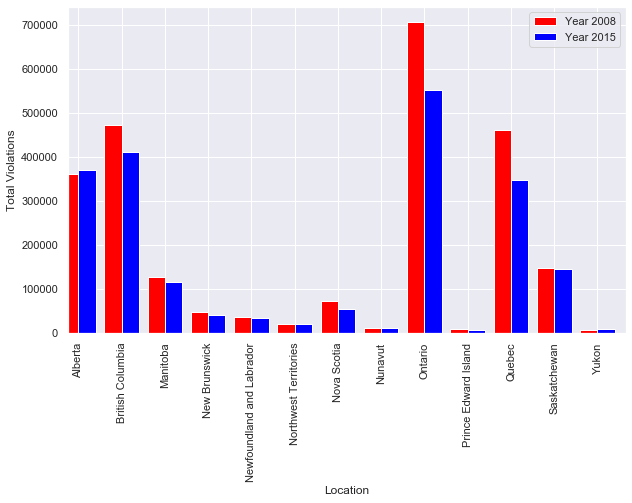

In [73]:

fig = plt.figure(figsize = (10,6))
ax = fig.add_subplot(111)
width = 0.4

data_provinces_2008.plot(kind='bar',x='Location',y='Total_violations', color='red', ax=ax, width=width, position=1)
data_provinces_2015.plot(kind='bar',x='Location',y='Total_violations', color='blue', ax=ax, width=width, position=0)
ax.set_ylabel("Total Violations")
ax.legend(['Year 2008', 'Year 2015'])

plt.show()

### 3.2.2 Compare population statistic for 2008 and 2015 years  

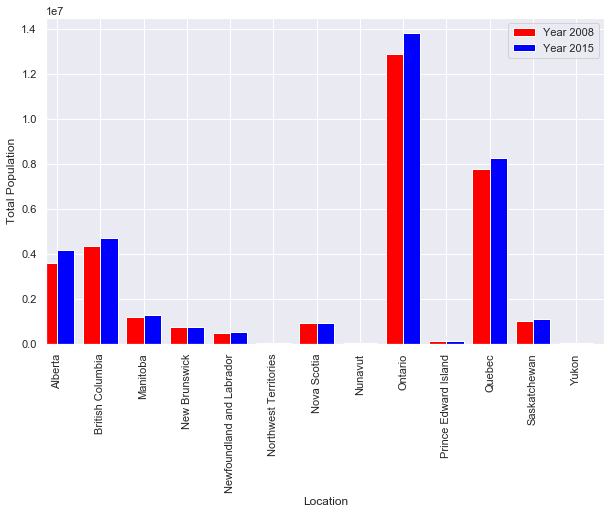

In [74]:
fig = plt.figure(figsize = (10,6))
ax = fig.add_subplot(111)
width = 0.4

data_provinces_2008.plot(kind='bar',x='Location',y='Total_Population', color='red', ax=ax, width=width, position=1)
data_provinces_2015.plot(kind='bar',x='Location',y='Total_Population', color='blue', ax=ax, width=width, position=0)
ax.set_ylabel("Total Population")
ax.legend(['Year 2008', 'Year 2015'])

plt.show()

### 3.2.3 Compare crime per person statistic for 2008 and 2015 years  

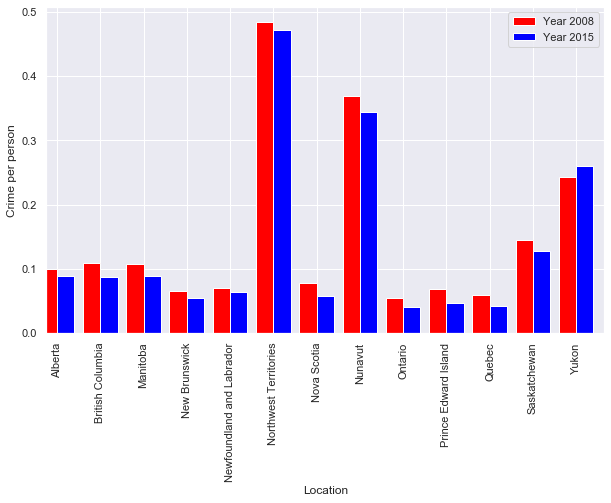

In [75]:
fig = plt.figure(figsize = (10,6))
ax = fig.add_subplot(111)
width = 0.4

data_provinces_2008.plot(kind='bar',x='Location',y='Crime_per_person', color='red', ax=ax, width=width, position=1)
data_provinces_2015.plot(kind='bar',x='Location',y='Crime_per_person', color='blue', ax=ax, width=width, position=0)
ax.set_ylabel("Crime per person")
ax.legend(['Year 2008', 'Year 2015'])

plt.show()

### 3.2.4 Compare education expenditure per capita statistic for 2008 and 2015 years  

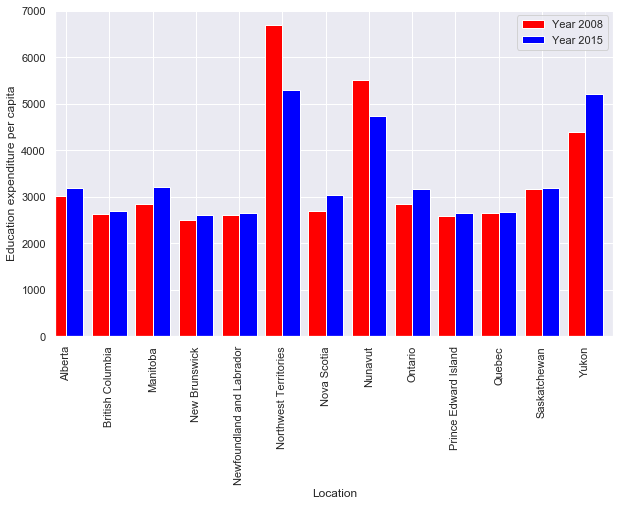

In [76]:
fig = plt.figure(figsize = (10,6))
ax = fig.add_subplot(111)
width = 0.4

data_provinces_2008.plot(kind='bar',x='Location',y='Expenditure_per_capita', color='red', ax=ax, width=width, position=1)
data_provinces_2015.plot(kind='bar',x='Location',y='Expenditure_per_capita', color='blue', ax=ax, width=width, position=0)
ax.set_ylabel("Education expenditure per capita")
ax.legend(['Year 2008', 'Year 2015'])

plt.show()

### 3.2.5 Compare education expenditure as persentage of GDP statistic for 2008 and 2015 years  

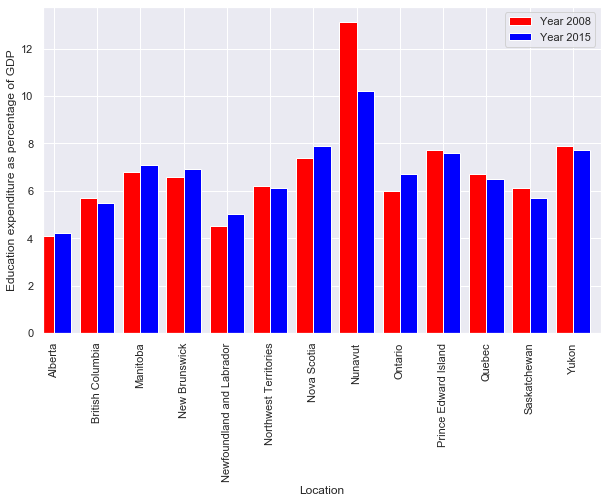

In [77]:
fig = plt.figure(figsize = (10,6))
ax = fig.add_subplot(111)
width = 0.4

data_provinces_2008.plot(kind='bar',x='Location',y='Expenditure_as_percentage_of_GDP', color='red', ax=ax, width=width, position=1)
data_provinces_2015.plot(kind='bar',x='Location',y='Expenditure_as_percentage_of_GDP', color='blue', ax=ax, width=width, position=0)
ax.set_ylabel("Education expenditure as percentage of GDP")
ax.legend(['Year 2008', 'Year 2015'])

plt.show()